### WORKED WITH MARC SUDA

## Project 1

In this project we will implement [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) to solve the problems of both linear regression and logistic regression.


(The lectures I made on gradient descent can be found [here](https://www.youtube.com/playlist?list=PL0LaMcMQNvEgh29nMA9eXI6DpL2krAIdh))

At the end is a challenge for you on real data. 

As usual you can work in teams of size 3 or less, with explicit attribution from team members.

No code from the internet, even with citations, is acceptable.  

**Due: 3/26/19**


First, we create some data based on a noisy target which happens to be a line.

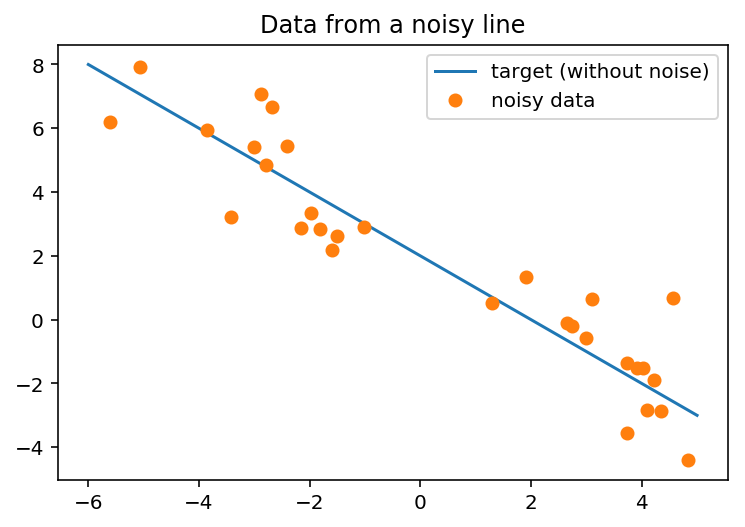

In [3]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 2-x

a,b = -6,5
x = np.linspace(a,b)

N = 30

domain = np.random.rand(N)*(b-a)+a

noise = np.random.randn(N)

fn = f(domain)+noise

plt.plot(x,f(x),label="target (without noise)")
plt.plot(domain,fn,'o',label="noisy data")
plt.title("Data from a noisy line")
#plt.savefig("A.png")
plt.legend()
plt.show()

Now we perform linear regression using the normal equations to fit the data with a line.

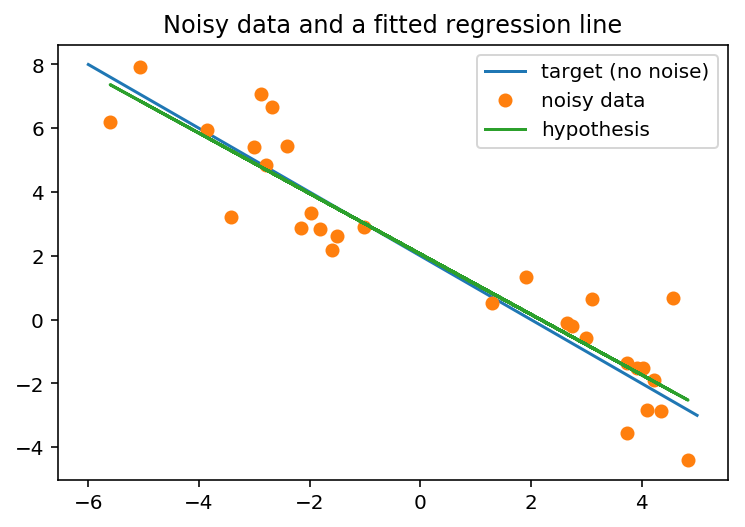

array([ 2.05854917, -0.94713003])

In [4]:
X = np.ones(N*2).reshape(N,2)

X[:,1] = domain

y = fn

w = np.linalg.pinv(X).dot(y)

plt.plot(x,f(x),label="target (no noise)")
plt.plot(domain,fn,'o',label="noisy data")
plt.plot(domain,X.dot(w),label="hypothesis")
#plt.savefig("B.png")
plt.legend()
plt.title("Noisy data and a fitted regression line")
plt.show()
w

### Gradient Descent 


#### Part 1:  Implementing Gradient Descent 

In the above examples we used the so-called "normal equations" to solve the linear regression problem.  Linear regression has an error function that is unusually simple.  But in other cases the system of equations that must be solved to optimize a model can't be solved "analytically" and has to be approximated.

We will implement gradient descent to solve the linear regression optimization problem.  This is a simple case which makes a nice warm up for solving the optimization problem that comes up in logistic regression.  

To follow the discussion below, you might want to take a peek at the next cell, where an outline of gradient descent is sketched for you in code. 

In order to implement gradient descent we write a "generic" descent function called `grad_des`.  The `gradient` variable in this function points to the gradient function the user wishes to use.  By default it uses the gradient defined in `grad_lc` which is $\nabla J$, the gradient of the error function $J$ used in linear regression (or classification).  The name `grad_lc` is supposed to suggest "gradient used in linear classification".

By passing other values of `gradient` to `grad_des` we can make the same code work for other optimization problems, for example solving $\nabla J = \bar{0}$ where $J(\bar{w})$ is the error function for logistic regression.


You should make use of the fact that the book tells you a vectorized version of $\nabla J$ for the linear regression error function $J(\bar{w})=E_{in}(h)$.

Namely, for linear regression, 

$$\nabla J(\bar{w}) = \frac{1}{N}(X^TX\bar{w}-X^T\bar{y})$$

This is a _vectorized_ version of $\nabla J$, meaning that it can be evaluated using highly optimized linear algebra libraries.  It is also true that 

$$\nabla J(\bar{w}) = \frac{1}{N}\sum_{n=1}^N (\bar{w}^T\bar{x}_n-y_n)\bar{x}$$

But this version of the gradient will take longer to evaluate if it is implemented naturally using a python repeat loop.  You can observe in the cells below that this form of the function is actually 34 times slower than the vectorized version!

#### Description of `grad_des`

When you write `grad_des` the function needs to do these things:  

1. Randomly initialize $\bar{w}$.
2. For the given number of iterations, perform the gradient descent update rule $\bar{w} = \bar{w} - \eta\nabla{J}(\bar{w})$.
3. Return $\bar{w}$.
The book mentions several strategies for deciding when to stop gradient descent.  The simplest is to simply run for a given number of iterations.  This is the strategy we will use.  More sophisticated approaches might also incorporate information about how much the error drops in subsequent iterations, or the magnitude of the gradient.

If your code works correctly, the cell below should produce an image that looks like this:

![img](D.png)

4.91 µs ± 320 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


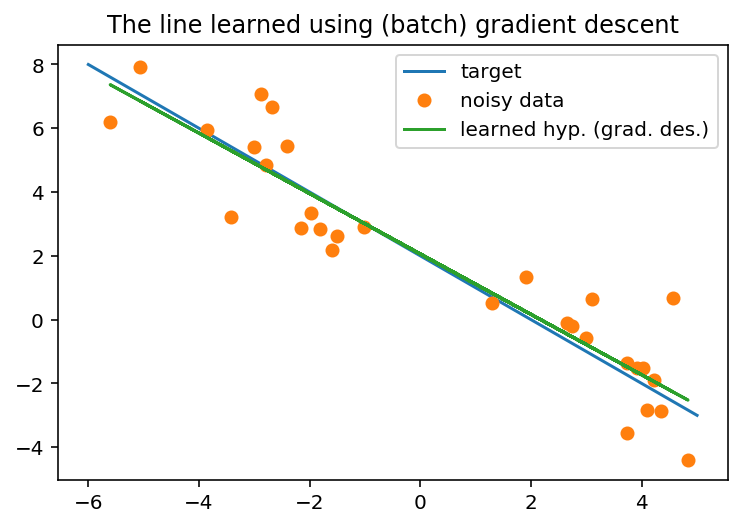

array([ 2.05854917, -0.94713003])

In [5]:
def grad_lc(X,w,y):
    """The gradient goes here"""
    Xt = np.transpose(X)
    tot = Xt.dot(X).dot(w)-Xt.dot(y)
    #tot = (X[0].dot(w)-y[0])*X[0]
    #for i in range(1,X.shape[0]):
     #   tot += (X[i].dot(w)-y[i])*X[i]
    return 1/X.shape[0]*tot

def grad_des(X,y,eta=0.1,iterations=1000,gradient=grad_lc):
    np.random.seed(100)
    assert(y.ndim==1)
    """The general gradient descent update stuff goes here."""
    #what = np.random.normal(size=2) # initialize weights from the normal distribution
    #what = np.array(what)
    what = np.random.randn(X.shape[1])
    i = 0
    while i < iterations:
        i +=1
        what = what - eta*gradient(X,what,y)
    return what

%timeit grad_lc(X,w,y)
w = grad_des(X,y)
g = X.dot(w)
plt.title("The line learned using (batch) gradient descent")
plt.plot(x,f(x),label="target")
plt.plot(domain,fn,'o',label="noisy data")
plt.plot(domain,g,label="learned hyp. (grad. des.)")
plt.legend()
#plt.savefig("D.png")
plt.show()


w

In [6]:
## The naive version of the gradient, using repeat loops

def slow_grad_lc(X,w,y):
    tot = (X[0].dot(w)-y[0])*X[0]
    for i in range(1,X.shape[0]):
        tot += (X[i].dot(w)-y[i])*X[i]
    return 1/X.shape[0]*tot

In [7]:
%timeit slow_grad_lc(X,w,y)

162 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%timeit grad_lc(X,w,y)

5.43 µs ± 529 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Stochastic gradient descent

#### Part 2:  Implementing stochastic gradient descent

(There is a video on stochastic gradient descent [here](https://www.youtube.com/playlist?list=PL0LaMcMQNvEgh29nMA9eXI6DpL2krAIdh).)

As explained in the book, computing the gradient function can be slow if `X` is large.  This is because the error function (and the gradient) depends on every example in the dataset.  

One solution to this problem is "stochastic" gradient descent.  This method works as follows.  We write a very simple gradient function `e_lc` which is like `grad_lc` except that it "thinks" the dataset only has a single example `x`.  This makes the expression for the gradient much simpler (because no sum is necessary and $N=1$).  

The descent part of the algorithm will occur in `stoch_grad_des`.  This is similar to `grad_des`, except at the point where we would have called `grad_lc` (using the full `X`) we instead pick a row `x` in `X` uniformly at random and send it to `e_lc`.  

The method works because the "expected" vector returned by `e_lc` is actually `grad_lc`.  

You should implement these functions below.  If your code is correct the output should look roughly like this:

![img](C.png)

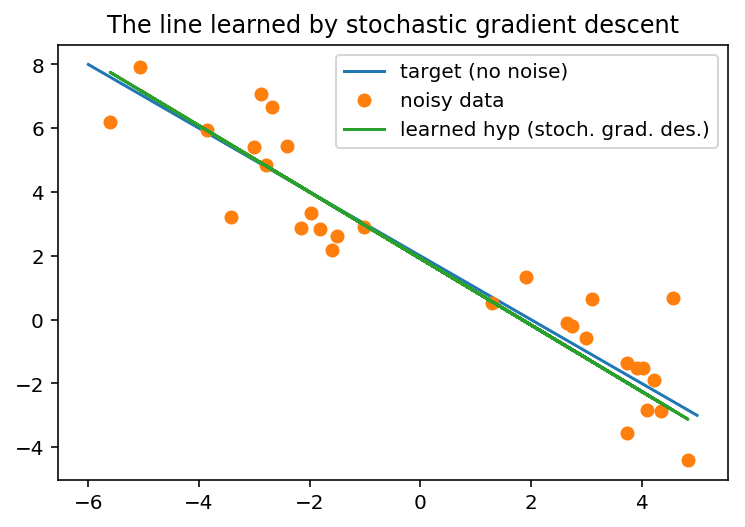

In [9]:

def e_lc(x,w,yi):
    """loss for linear regression"""
    return ((np.transpose(w).dot(x)) - yi)*x
    
    
def stoch_grad_des(X,y,eta=0.01,iterations=10000,e=e_lc):
    np.random.seed(100)
    """The general stochastic gradient descent stuff"""
    what = np.random.randn(X.shape[1]) # initialize weights from the normal distribution
    
    i = 0
    while i < iterations:
        i +=1
        #pick a row x in X uniformly at random and send it to e_lc.
        #print(X.shape[0])
        randomRow = int(np.random.uniform(0,X.shape[0])) # get a row uniformly at random
        x = X[randomRow,:] # x is now the random row
        yi = y[randomRow] # yi is the corresponding y
        what = what - eta*e_lc(x,what,yi)
    return what



w = stoch_grad_des(X,y)
g = X.dot(w)
plt.title("The line learned by stochastic gradient descent")
plt.plot(x,f(x),label="target (no noise)")
plt.plot(domain,fn,'o',label="noisy data")
plt.plot(domain,g,label="learned hyp (stoch. grad. des.)")
plt.legend()
#plt.savefig("C.png")
plt.show()

### Scaling the data

#### Part 3:  Implementing scaling

(There is a video on scaling [here](https://www.youtube.com/playlist?list=PL0LaMcMQNvEgh29nMA9eXI6DpL2krAIdh).)

In the cell below there are three functions.  The function `add_squares` adds columns to `X` which are the products of each choice of two of the existing columns.  This is an easy way to get a more complex hypothesis space.  It has nothing to do with the main thing we are studying in this worksheet (gradient descent).

The cell below also contains the `R2` function which you implemented in Homework 3.  

Finally, the cell contains a _scaling_ function called `scaler`.  This function takes two matrices with the same number of columns, thought of as the test data and the training data.  

This function should implement so called "standard" scaling.  In other words, if $\bar{\mu}$ is a vector of column averages of `X_train` and $\bar{\sigma}$ is a vector of column standard deviations from `X_train`, then every row $\bar{x}$ in both `X_train` and `X_test` should be replaced with

$$\bar{x} = \frac{\bar{x}-\bar{\mu}}{\bar{\sigma}}$$

where the vector division is elementwise (please see the video if this doesn't make sense).

We will assume that both `X_train` and `X_test` already have a bias column (which is column 0) and this will complicate things a bit.  You should make sure that even after scaling, the 0th column is still all ones.  The video has some advice on this point.

All of this can be done using numpy broadcast operations and there is no need to write a python repeat loop.


In [10]:
def add_squares(X):
    N,d = X.shape[0],X.shape[1]-1
    _X = np.ones(N*(d+1 + d*(d+1)//2)).reshape(N,(d+1 + d*(d+1)//2))
    _X[:,:d+1] = np.copy(X[:,:d+1])
    count = d+1
    for a in range(1,d+1):
        for b in range(1,a+1):
            _X[:,count] = X[:,a]*X[:,b]
            count += 1
    return _X
    
def scaler(X_train,X_test):
    assert(X_train.shape[1]==X_test.shape[1])
    """scale the data using standard scaling """ 
    mu = np.mean(X_train,axis=0)
    mu[0] = 0
    sigma = np.std(X_train,axis=0)
    zeros = np.isclose(sigma,np.zeros(sigma.shape[0]))
    sigma[zeros] = 1
    A = (X_train - mu)/sigma
    B = (X_test - mu)/sigma
    return A,B
    

def R2(g,y):
    """g is the predicted outcomes and y is the actual outcomes"""
    mu = np.mean(y)
    SStot = np.sum((y-mu)**2)
    SSres = np.sum((g-y)**2)
    return 1-SSres/SStot


#### Testing the scaler

You can compare your results to those below.  The original output will be preserved in the HTML version of this doc.


In [11]:
##  Use this cell to test your scaler.
##  The correct results will be preserved in the HTML file 

np.random.seed(1400)
P = np.random.permutation(1000)
X_test = np.ones((10,11))
X_train = np.copy(X_test)
X_test[:,1:] = P[:100].reshape(10,10)
X_train[:,1:] = P[100:200].reshape(10,10)

A,B = scaler(X_test,X_train)
print(A)
print(B)

[[ 1.          0.21670525  1.64535816 -1.84612885 -1.2162975   1.62895323
  -0.95119504 -0.56289714  0.66542861  1.25359212 -1.14022029]
 [ 1.         -0.33815883 -0.5232365   0.31948551  1.25923713 -1.75722981
   1.07390938  0.76652161 -1.68566454 -0.22043389 -0.89833283]
 [ 1.         -1.79313572  1.61173654 -0.69827672  0.08490336 -1.41064401
  -0.56652058 -1.24408692 -1.07563336 -0.73299294  1.27121166]
 [ 1.          0.85788151 -1.6999933  -0.96610888  0.24104746  0.21472384
   0.81640002  1.81394245 -0.98660178 -0.04288076 -0.47409943]
 [ 1.         -1.74997963 -0.29208785  0.14730769  1.2234541  -0.07608952
  -1.58384148  1.15472654  0.79732724  1.59529816 -1.65004464]
 [ 1.         -0.32274593 -0.45179055  1.18802696  1.13562305  0.85610675
   1.30916484 -0.14905604  0.92592841 -1.23215175  0.21807085]
 [ 1.          1.11065292 -1.02756084 -0.01339161 -0.90400929  0.79236683
  -0.22317477 -0.24793843 -0.02044429  0.37922669 -0.28058946]
 [ 1.          0.96577174  0.29208785  1.

### Bike sharing data

Below we read in the [Bike Sharing](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) dataset.



In [12]:
import pandas as pd
#https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


The data is in the form of a pandas dataframe.  Below we convert it to a familiar numpy array.

In [13]:
as_numpy = day_df.values
ones = np.ones(as_numpy.shape[0]).reshape(as_numpy.shape[0],1)
X = np.hstack((ones,as_numpy[:,2:-3]))
X = X.astype('float')
X = add_squares(X)   ###  You can experiment with this.  It will slow things down a bit, but performance goes up.

In [14]:
## This function should be familiar from HW 3
##
def test_train_split(X,y,train_percent=0.8,rand_seed=42):
    np.random.seed(rand_seed)
    cutoff = int(train_percent*X.shape[0])
    shuff = np.random.permutation(X.shape[0])
    X2 = X[shuff]
    y2 = y[shuff]
    X_train = X2[:cutoff]
    X_test = X2[cutoff:]
    y_train = y2[:cutoff]
    y_test = y2[cutoff:]
    return X_train,X_test,y_train,y_test

### Test drive

In the cell below we try out the functions you've written on real data.


#### Part 4
Experiment with commenting out scaling.  What happens?

When commenting out scaling, there doesn't seem to be a difference in error or time it takes to compute. If anything, the time goes up by .1 seconds.
I assume that the scaling was supposed to decrease error rate so that the data scales and we have a rough average of the data.

Experiment with changing the learning rate or adjusting the number of iterations.  What happens?

By adjusting the number of iterations from 1000 to 10000, there was no change in the error rates. Rather, the time it took to complete changed from 11 seconds to 84 seconds.
If there was ANY change in the error rates, it would be that the error calculated by R2 increased by one, so rather than it having 12% error, it had 13% error.


What happens if you add extra columns to `X` using the `add_squares` function?

By using the add squares function, it seems that the time it takes to compute increases BUT the error rate decreases.

Error rate without add squares:
MSE= 748616.0462145114 748650.4864151271 752106.2818878364
R2=  0.8002441102343252 0.800234920432754 0.7993127982006833

Error rate with add squares:
MSE= 374544.5379958265 423246.6931386366 431840.49595586536
R2=  0.9000589450058469 0.8870635752388591 0.8847704601808707

In [15]:
X,X = scaler(X,X)
y_casual = as_numpy[:,-3]
y_registered = as_numpy[:,-2]
y_tot = y_casual+y_registered

y_target = y_tot
w_ne = np.linalg.pinv(X).dot(y_target)
w_gd = grad_des(X,y_target)
w_sgd = stoch_grad_des(X,y_target,eta=0.001,iterations=100000)


g_ne = X.dot(w_ne)
g_gd = X.dot(w_gd)
g_sgd = X.dot(w_sgd)

mse = lambda g,f: np.mean((g-f)**2)



print("MSE=",mse(g_ne,y_target),mse(g_gd,y_target),mse(g_sgd,y_target))
print("R2= ",R2(g_ne,y_target),R2(g_gd,y_target),R2(g_sgd,y_target))

MSE= 374544.5379958265 423246.6931386366 431840.49595586536
R2=  0.9000589450058469 0.8870635752388591 0.8847704601808707


#### Now with a test set...

You should have found that without adding squares the R2 score of linear regression is about 0.8 on this dataset.

When we add squares the score goes up to about 0.9.  But is this just overfitting the training data?

Yes, this is overfitting the training data by a slight margin, because it increases the training data by 10%, but the test data is only increased by 5%.

#### Part 5

Does adding squares to `X` make sense for this dataset?  Use the output of the cell below (where squares ARE added) to help you answer.

Adding squares to X makes sense for this dataset because the test data has an increased MSE and R2 score when squares are added, but a reduced score when I comment out this line:
[[```
X = add_squares(X)
```]]


In [16]:
as_numpy = day_df.values
ones = np.ones(as_numpy.shape[0]).reshape(as_numpy.shape[0],1)
X = np.hstack((ones,as_numpy[:,2:-3]))
X = X.astype('float')
X = add_squares(X)


y_target = y_tot

X_train,X_test,y_train,y_test = test_train_split(X,y_target)
X_train,X_test = scaler(X_train,X_test)



w_ne = np.linalg.pinv(X_train).dot(y_train)
w_gd = grad_des(X_train,y_train)
w_sgd = stoch_grad_des(X_train,y_train,eta=0.001,iterations=200000)


g_ne = X_test.dot(w_ne)
g_gd = X_test.dot(w_gd)
g_sgd = X_test.dot(w_sgd)


print("Test")
print("MSE=",mse(g_ne,y_test),mse(g_gd,y_test),mse(g_sgd,y_test))
print("R2= ",R2(g_ne,y_test),R2(g_gd,y_test),R2(g_sgd,y_test))
print("Train")
g_ne = X_train.dot(w_ne)
g_gd = X_train.dot(w_gd)
g_sgd = X_train.dot(w_sgd)
print("MSE=",mse(g_ne,y_train),mse(g_gd,y_train),mse(g_sgd,y_train))
print("R2= ",R2(g_ne,y_train),R2(g_gd,y_train),R2(g_sgd,y_train))

Test
MSE= 623312.214012632 579088.3082535405 643908.1881073128
R2=  0.8407887002244795 0.852084717467152 0.8355279148074131
Train
MSE= 360185.98519764806 412796.6904281118 426485.8618448531
R2=  0.9027899201451287 0.8885908922349559 0.8848963413605286


### Classification with logistic regression

####  Part 6: Implementing logistic regression

Below you should implement the gradient for logistic regression, named `grad_logr`.

The book does not provide a vectorized version for this one.  Try to figure out a way to do it with only numpy (no python repeat loops). It will be tempting to google for it, but don't!

$$\nabla J(\bar{w}) = -\frac{1}{N}\sum_{n=1}^N \frac{y_n\bar{x}_n}{1+e^{y_n\bar{w}^T\bar{x}_n}}$$

In [22]:
#from scipy.special import expit

## The logistic function
def expit(s):
    return 1/(1+np.exp(-s))



def grad_logr(X,w,y):
    """For batch gradient descent"""
    # This is copied here just for reference.
    #Xt = np.transpose(X)
    #tot = Xt.dot(X).dot(w)-Xt.dot(y)
    #return 1/X.shape[0]*tot

    tot =(y*np.transpose(X))/ (1+ np.exp(y*X.dot(w)))
    
    return -(1/X.shape[0]*tot)

def e_logr(x,w,yi):
    """For stochastic gradient descent"""
    return ((np.transpose(w).dot(x)) - yi)*x

#### Testing `grad_logr`

The following cells will provide a quick test of your gradient function.

The values and the speed should be roughly similar to the output below.  

In [23]:
## Original values in HTML file
np.random.seed(2001)
X = np.random.randn(10000*15).reshape(10000,15)
y = np.ones(X.shape[0])
w = np.random.randn(X.shape[1])
grad_logr(X,w,y)

array([[ 5.54119798e-05, -1.28895886e-04,  1.97861181e-05, ...,
        -4.63029902e-05, -1.84939392e-04, -5.48255132e-06],
       [-9.00162028e-05,  4.46152803e-05,  5.09921722e-05, ...,
         9.76347513e-05,  2.01672328e-04, -4.57855841e-06],
       [ 5.06417644e-05,  1.54001013e-04,  2.29638628e-05, ...,
        -9.15112421e-05, -5.99475570e-05,  2.20888059e-06],
       ...,
       [ 8.50202664e-05,  1.00294930e-04,  2.06752985e-05, ...,
         3.46317716e-06,  7.69322977e-06, -1.37263027e-05],
       [-4.29723747e-05,  9.19029887e-05, -5.56986333e-05, ...,
         3.94164183e-05, -1.49159227e-05, -4.26497284e-06],
       [-5.97694919e-05,  2.66129844e-05,  7.03201493e-06, ...,
         3.40791943e-06, -6.60620280e-05, -8.90741486e-08]])

In [24]:
## Original values:  3 or 4 ms

%timeit grad_logr(X,w,y)

5.87 ms ± 1.08 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


You can also test your gradient function on the code below.

It should make an image that looks roughly like this:

![img](E.png)

You can also see how to use `grad_desc` together with your new gradient function in the code below.


(50,)
(2,)
(50, 2)


ValueError: operands could not be broadcast together with shapes (2,) (2,50) 

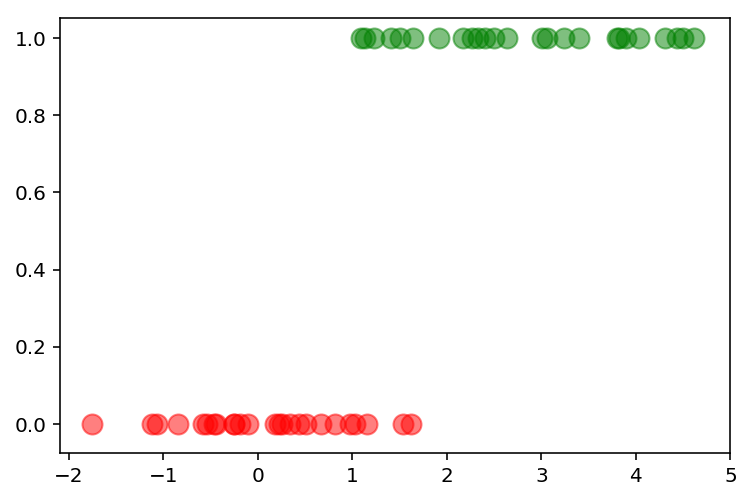

In [20]:
np.random.seed(100)
Nneg = 25
Npos = 25
mu_neg = 0
sigma_neg = 1
negpts = np.random.randn(Nneg)*sigma_neg+mu_neg
mu_pos = 3
sigma_pos = 1.1
pospts = np.random.randn(Npos)*sigma_pos + mu_pos

plt.scatter(negpts,np.zeros(Nneg),c='r',alpha=0.5,s=100,label="positive")
plt.scatter(pospts,np.ones(Npos),c='g',alpha=0.5,s=100,label="negative")

domain = np.hstack((pospts,negpts))
args = np.argsort(domain)
domain = domain[args]
X = np.ones((Npos+Nneg)*2).reshape(Npos+Nneg,2)
X[:,1] = domain

y = np.hstack((np.ones(Npos),-np.ones(Nneg)))
y = y[args]


w = grad_des(X,y,gradient=grad_logr)
g = expit(X.dot(w))
plt.plot(domain,g,label="learned hypothesis")
plt.plot(np.linspace(-1.1,6),[1/2]*50,label="threshold")
plt.legend()
plt.title("Logistic regression on 1D data")
#plt.savefig("E.png")
plt.show()

The code below compares logistic regression to linear classification on a simple dataset.
Take note of how predictions are made and error is computed using the threshold. 


In [0]:
np.random.seed(100)

Nneg = 25
Npos = 25
mu_neg = 0
sigma_neg = 1
negpts = np.random.randn(Nneg)*sigma_neg+mu_neg
mu_pos = 3
sigma_pos = 1.1
pospts = np.random.randn(Npos)*sigma_pos + mu_pos

plt.scatter(negpts,np.zeros(Nneg),c='r',alpha=0.5,s=100,label="negative")
plt.scatter(pospts,np.ones(Npos),c='g',alpha=0.5,s=100,label="positive")

#plt.scatter(negpts,-np.ones(Nneg),c='r',alpha=0.5,s=100,label="also negative")


domain = np.hstack((pospts,negpts))
args = np.argsort(domain)
domain = domain[args]
X = np.ones((Npos+Nneg)*2).reshape(Npos+Nneg,2)
X[:,1] = domain

y = np.hstack((np.ones(Npos),-np.ones(Nneg)))
y = y[args]


w = grad_des(X,y,gradient=grad_logr)
g = expit(X.dot(w))
plt.plot(domain,g,label="logistic reg hypothesis")
plt.plot(np.linspace(-1.1,6),[1/2]*50,label="threshold")

logregerr = np.mean(2*(g>0.5)-1 != y)

w = np.linalg.pinv(X).dot((y+1)/2)

linregerr = np.mean(2*(X.dot(w)>1/2)-1 != y)
plt.plot(domain,X.dot(w),label="linear reg hypothesis",color="black")
#plt.axis([-1,6,-0.2,1.5])
plt.legend()
plt.title("Logistic and linear regression on 1D data")
plt.show()

print("Log Reg error = ",logregerr,", Linear error = ",linregerr)

Below we compare logistic regression to linear classification on the breast cancer data.


In [0]:
#Breast Cancer Data
D = np.loadtxt(open("num_data.csv", "rb"), delimiter=",", skiprows=0)
X = np.ones(D.shape[0]*(D.shape[1]-1)).reshape(D.shape[0],D.shape[1]-1)
X[:,1:] = D[:,2:]
y = 2*D[:,1]-1

X,X = scaler(X,X)
w = grad_des(X,y,iterations=1000,gradient=grad_logr)
g = (expit(X.dot(w))>0.5)*2-1

print(f"Log reg error = {np.mean(y != g)}")

w = np.linalg.pinv(X).dot(y)
g = (X.dot(w)>0)*2-1

print(f"Lin classification error = {np.mean(y != g)}")

### Home Abalone

In this part of the project you will put all of the above together to build a model for a real dataset.

First download the "abalone" data from the UCI ML repository: https://archive.ics.uci.edu/ml/datasets/Abalone

Upload the data to this folder.

Your job is to build a classifier using logistic regression for this data.

Here is a summary of the data:

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

   Statistics for numeric domains:

		Length	Diam	Height	Whole	Shucked	Viscera	Shell	Rings
	Min	0.075	0.055	0.000	0.002	0.001	0.001	0.002	    1
	Max	0.815	0.650	1.130	2.826	1.488	0.760	1.005	   29
	Mean	0.524	0.408	0.140	0.829	0.359	0.181	0.239	9.934
	SD	0.120	0.099	0.042	0.490	0.222	0.110	0.139	3.224
	Correl	0.557	0.575	0.557	0.540	0.421	0.504	0.628	  1.0
    
The target variable will be Rings.  The basic idea here is to estimate the age of an abalone without needing to saw into its shell to count the rings.

Note that Sex is given as a nominal value.  You will need to find a way to convert it to a numerical value.  

Using test and training sets, try to do the following things:

1.  Build a regression model for the number of rings (using linear regression).  How big an R2 score can you get on your test set?  Does it help to add more features?  

2.  Build a classifier (using logistic regression) which classifies abalone as having <= 10 rings or  > 10 rings.  How high an accuracy score can you get on your test set?

I am leaving this very open ended for you.  Please be sure to use all of the techniques you've learned in this worksheet and other places.  Make your presentation very clear and report-like so that I can easily tell what's what. There should be a fair amount of explanatory prose.

 

In [0]:
import pandas as pd
import numpy as np
#import regex as re
#https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#
#abalone_df = pd.read_csv("abalone.csv")
# to replace the values, i copy pasted the CSV into an excel sheet and used the CTRL +F replace function to do the following:
# F = 0
# M = 1
# I = 2
abalone_df = pd.read_csv("testabalone.csv")
i = 0
abalone_df.head()
as_numpy = abalone_df.values
#firstCol = as_numpy[:,0]
#firstCol.reshape(firstCol.shape[0],1)
print(as_numpy)

#firstCol = pd.factorize(firstCol)[0]
''' this takes WAY too long
while i < firstCol.shape[0]:
    if firstCol[i] == 'F':
        firstCol[i] = 0
    if firstCol[i] == 'M':
        firstCol[i] = 1
    if firstCol[i] == 'I':
        firsCol[i] = 2
'''

#print(firstCol)

#firstCol = re.sub("F", "0", firstCol)
#firstCol = re.sub("M","1", firstCol)
#firstCol = re.sub("I","2",firstCol)
########## NEED TO ADJUST CODE SO THAT IT PROPERLY LOADS


ones = np.ones(as_numpy.shape[0]).reshape(as_numpy.shape[0],1)
X = np.hstack((ones,as_numpy[:,2:-3]))
X = X.astype('float')

#X = add_squares(X)

In [21]:
X,X = scaler(X,X)
y_casual = as_numpy[:,-3]
y_registered = as_numpy[:,-2]
y_tot = y_casual+y_registered

y_target = y_tot
w_ne = np.linalg.pinv(X).dot(y_target)
w_gd = grad_des(X,y_target)
w_sgd = stoch_grad_des(X,y_target,eta=0.001,iterations=100000)


g_ne = X.dot(w_ne)
g_gd = X.dot(w_gd)
g_sgd = X.dot(w_sgd)

mse = lambda g,f: np.mean((g-f)**2)



print("MSE=",mse(g_ne,y_target),mse(g_gd,y_target),mse(g_sgd,y_target))
print("R2= ",R2(g_ne,y_target),R2(g_gd,y_target),R2(g_sgd,y_target))

ValueError: shapes (2,50) and (731,) not aligned: 50 (dim 1) != 731 (dim 0)

As shown above, we get a similar R2 score across the board no matter what type of gradient descent we use. When we add features, we get a lower R2 score.